### Downloading Images CAPCHA from KAGGLE

In [10]:
import requests
import time

for i in range(100):
    response = requests.get('https://rastreamento.correios.com.br/core/securimage/securimage_show.php')
    response.raise_for_status()
    with open(f'./data/{i}.jpg', 'wb') as file:
        file.write(response.content)
    time.sleep(1)

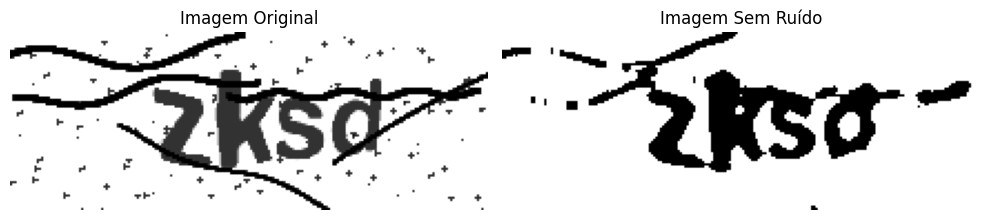

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
image = cv2.imread('./data/1.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar um filtro de mediana para remover ruídos
denoised_image = cv2.medianBlur(image, 7)

# Aplicar binarização (thresholding) para melhorar a visibilidade do texto
_, binary_image = cv2.threshold(denoised_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Mostrar as imagens usando matplotlib
plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.title('Imagem Original')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagem Sem Ruído')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


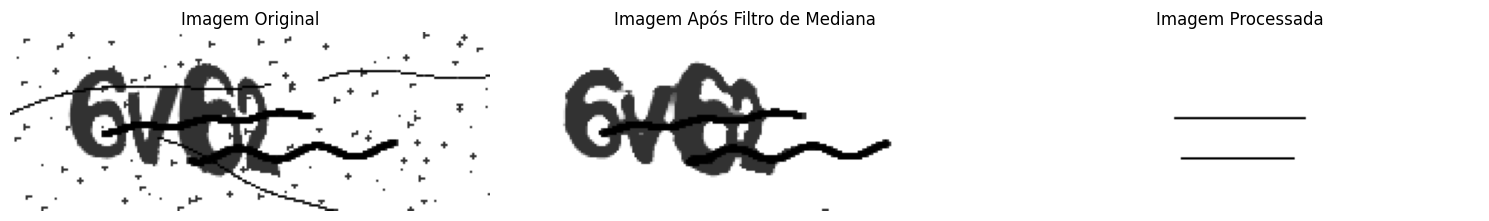

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
image_path = './data/3.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Aplicar filtro de mediana para remover ruídos
denoised_image = cv2.medianBlur(image, 5)

# Aplicar binarização (thresholding) para melhorar a visibilidade do texto
_, binary_image = cv2.threshold(denoised_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Remover linhas usando morfologia matemática
kernel = np.ones((1, 50), np.uint8)
removed_lines = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel, iterations=1)

# Aplicar abertura para remover pequenos objetos restantes
kernel = np.ones((2, 2), np.uint8)
opened_image = cv2.morphologyEx(removed_lines, cv2.MORPH_OPEN, kernel, iterations=1)

# Mostrar as imagens usando matplotlib
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Imagem Original')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Imagem Após Filtro de Mediana')
plt.imshow(denoised_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Imagem Processada')
plt.imshow(opened_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


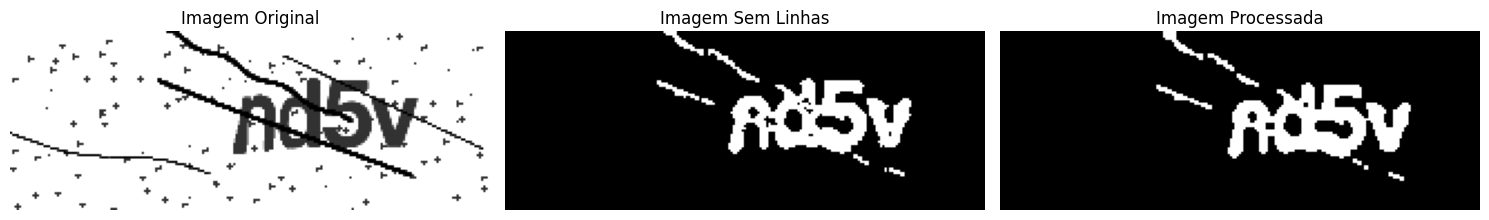

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
image_path = './data/0.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Aplicar filtro de mediana para remover ruídos
denoised_image = cv2.medianBlur(image, 5)

# Aplicar limiar adaptativo para binarização
binary_image = cv2.adaptiveThreshold(denoised_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                     cv2.THRESH_BINARY_INV, 11, 2)

# Detectar bordas usando Canny
edges = cv2.Canny(binary_image, 50, 150, apertureSize=3)

# Detectar linhas usando HoughLinesP
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

# Criar uma máscara para as linhas detectadas
mask = np.ones_like(binary_image) * 255

# Desenhar as linhas na máscara
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(mask, (x1, y1), (x2, y2), 0, 2)

# Aplicar a máscara à imagem binarizada
removed_lines = cv2.bitwise_and(binary_image, mask)

# Aplicar operações de morfologia para remover pequenos objetos restantes
kernel = np.ones((2, 2), np.uint8)
opened_image = cv2.morphologyEx(removed_lines, cv2.MORPH_OPEN, kernel, iterations=1)
closed_image = cv2.morphologyEx(opened_image, cv2.MORPH_CLOSE, kernel, iterations=1)

# Mostrar as imagens usando matplotlib
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Imagem Original')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Imagem Sem Linhas')
plt.imshow(removed_lines, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Imagem Processada')
plt.imshow(closed_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


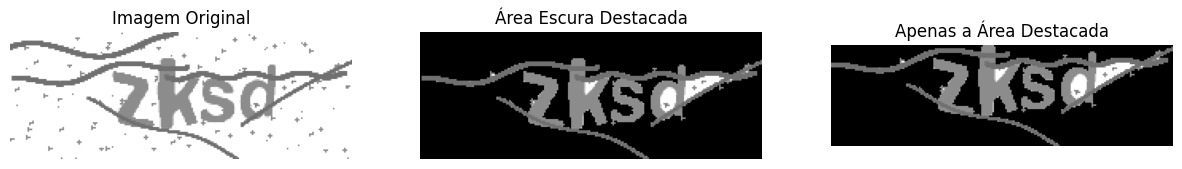

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
imagem = cv2.imread('./data/1.jpg')

# Converter para tons de cinza
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Aplicar filtro de desfoque para reduzir ruído
imagem_suavizada = cv2.GaussianBlur(imagem_cinza, (1, 1), 0)

# Binarizar a imagem invertida para destacar áreas escuras
_, imagem_binaria = cv2.threshold(imagem_suavizada, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Encontrar contornos
contornos, _ = cv2.findContours(imagem_binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Encontrar o maior contorno (área mais escura)
maior_contorno = max(contornos, key=cv2.contourArea)

# Criar uma máscara para a área destacada
mascara = np.zeros_like(imagem_cinza)
cv2.drawContours(mascara, [maior_contorno], -1, 255, thickness=cv2.FILLED)

# Extrair a área destacada da imagem original
imagem_destacada = cv2.bitwise_and(imagem, imagem, mask=mascara)

# Encontrar o bounding box do maior contorno
x, y, w, h = cv2.boundingRect(maior_contorno)
area_destacada = imagem_destacada[y:y+h, x:x+w]

# Plotar as imagens antes, depois e a área destacada
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Imagem original
axs[0].imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
axs[0].set_title('Imagem Original')
axs[0].axis('off')

# Imagem com área destacada
axs[1].imshow(cv2.cvtColor(imagem_destacada, cv2.COLOR_BGR2RGB))
axs[1].set_title('Área Escura Destacada')
axs[1].axis('off')

# Apenas a área destacada
axs[2].imshow(cv2.cvtColor(area_destacada, cv2.COLOR_BGR2RGB))
axs[2].set_title('Apenas a Área Destacada')
axs[2].axis('off')

plt.show()


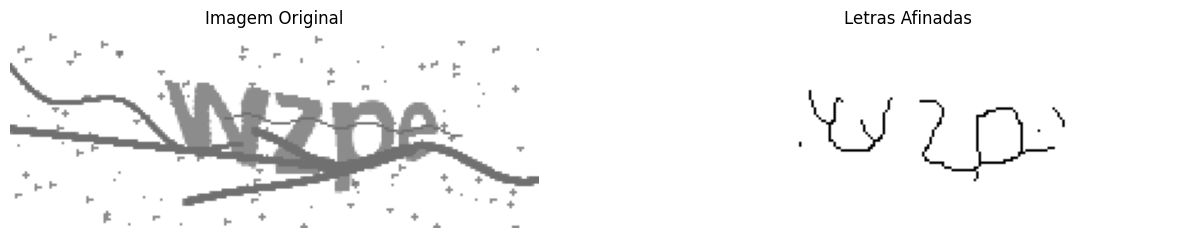

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
imagem = cv2.imread('./data/99.jpg')

# Converter para tons de cinza
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Aplicar filtro de desfoque para reduzir ruído
imagem_suavizada = cv2.GaussianBlur(imagem_cinza, (5, 5), 0)

# Binarizar a imagem invertida para destacar áreas escuras
_, imagem_binaria = cv2.threshold(imagem_suavizada, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Aplicar morfologia para remover linhas finas
kernel = np.ones((5, 5), np.uint8)
imagem_morfologia = cv2.morphologyEx(imagem_binaria, cv2.MORPH_OPEN, kernel)

# Esqueletonização para afinar as letras
esqueleto = cv2.ximgproc.thinning(imagem_morfologia, thinningType=cv2.ximgproc.THINNING_ZHANGSUEN)

# Inverter a imagem para obter o resultado final
imagem_final = cv2.bitwise_not(esqueleto)

# Plotar as imagens antes e depois
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Imagem original
axs[0].imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
axs[0].set_title('Imagem Original')
axs[0].axis('off')

# Imagem com letras afinadas
axs[1].imshow(imagem_final, cmap='gray')
axs[1].set_title('Letras Afinadas')
axs[1].axis('off')

plt.show()


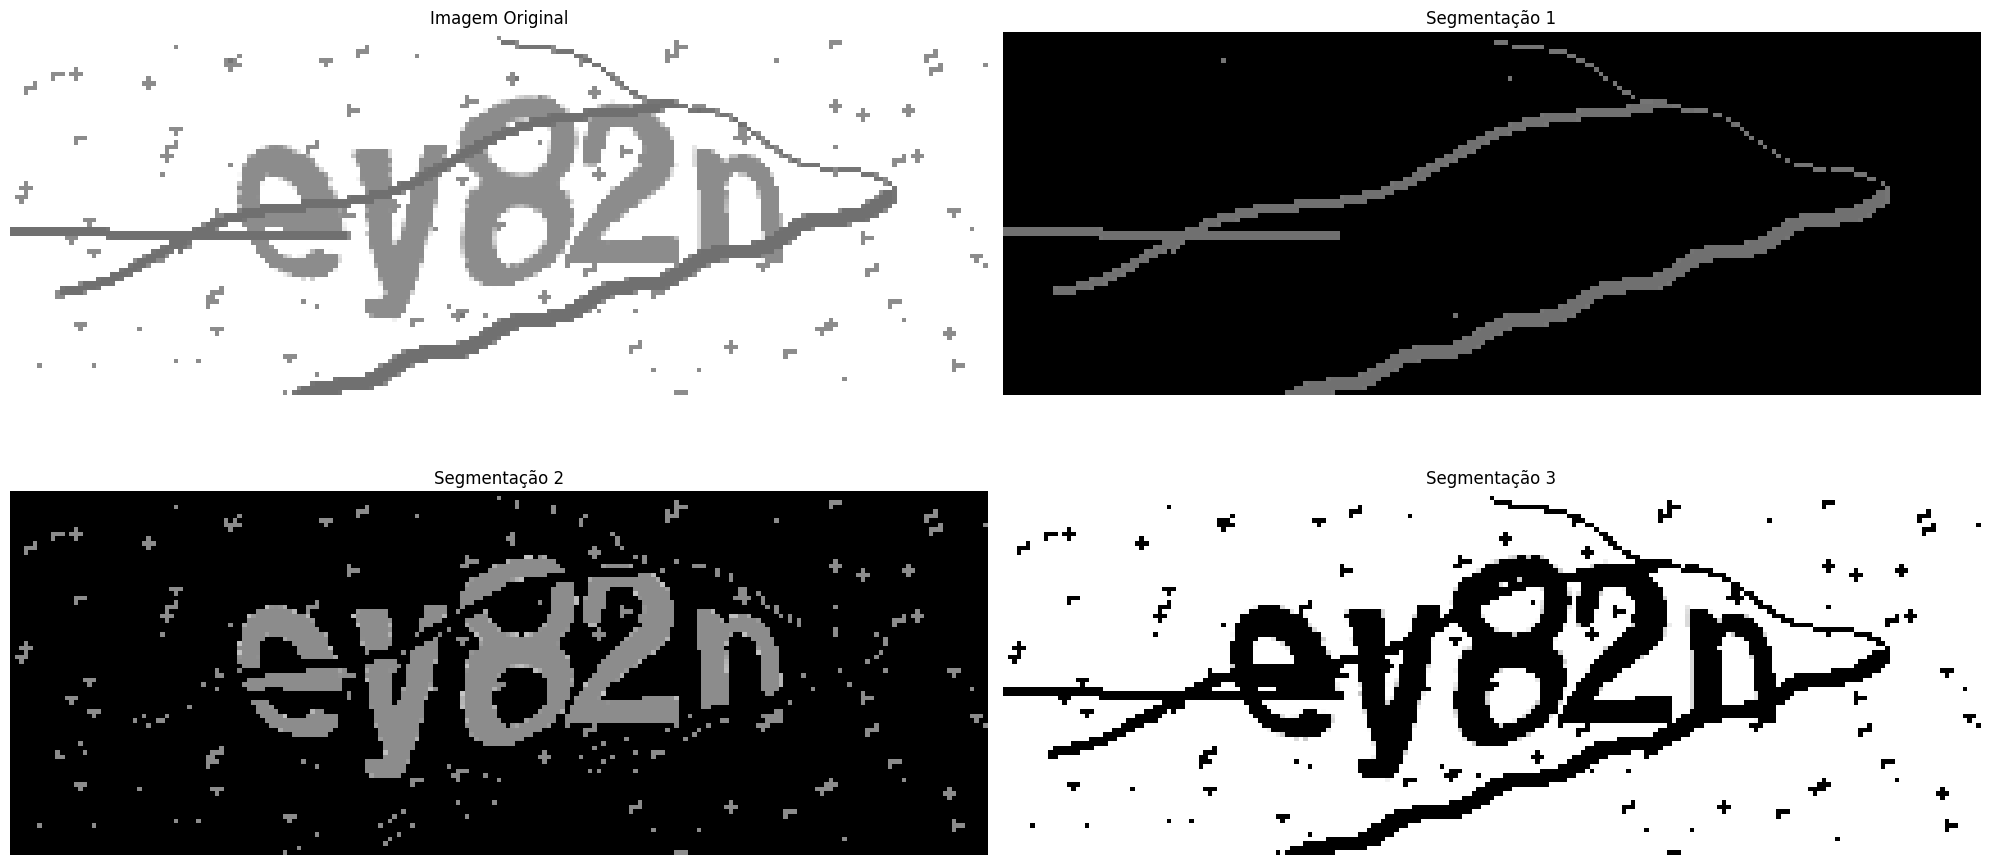

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
image_path = './data/70.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Redimensionar a imagem para acelerar o processamento (opcional)
# image_rgb = cv2.resize(image_rgb, (0, 0), fx=0.5, fy=0.5)

# Converter a imagem para uma matriz de 2D
pixel_values = image_rgb.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Definir critérios e aplicar K-means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Converter os centros de volta para inteiros
centers = np.uint8(centers)

# Mapear os labels para as cores dos centros
segmented_image = centers[labels.flatten()]

# Redimensionar a imagem segmentada de volta para a forma original
segmented_image = segmented_image.reshape(image_rgb.shape)

# Criar máscaras para cada cor
masks = []
for i in range(k):
    mask = cv2.inRange(labels, i, i)
    masks.append(mask.reshape(image_rgb.shape[:2]))

# Mostrar a imagem original e as segmentações
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.title('Imagem Original')
plt.imshow(image_rgb)
plt.axis('off')

for i in range(k):
    masked_image = cv2.bitwise_and(image_rgb, image_rgb, mask=masks[i])
    plt.subplot(2, 2, i + 2)
    plt.title(f'Segmentação {i+1}')
    plt.imshow(masked_image)
    plt.axis('off')

plt.tight_layout()
plt.show()
